# Parameters determining borrower rate of interest - prosper loan 
## by Deepti Pradeep

## Investigation Overview

This presentation aims to showcase the factors influencing and their relationship with borrower rate of interest through visualization. Various graphs for univariate, bivariate and multivariate explorations are plotted to show how these parameters impact borrower rate of interest.

## Dataset Overview

The dataset analyzed consisted of 113937 entries of prosper loan. This dataset had 81 various paramters out of which few parameters which weren't of much use were dropped to carry out with analysis and visualization.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df_prosper_loan = pd.read_csv('prosperLoanData.csv')

In [5]:
#data cleaning 
df = df_prosper_loan.copy()
#Remove all columns that are not of interest to the analysis
df = df.drop(['ClosedDate','EstimatedEffectiveYield','EstimatedLoss', 'EstimatedReturn','GroupKey', 'FirstRecordedCreditLine', 'CurrentCreditLines',
              'OpenCreditLines','TotalCreditLinespast7years',
             'InquiriesLast6Months', 'TotalInquiries','DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
             'TradesOpenedLast6Months','TradesOpenedLast6Months','LoanCurrentDaysDelinquent','LoanFirstDefaultedCycleNumber'], axis =1)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Borrower Rate Distribution

The graph looks to be nearly normally distributed except that there is a spike at 0.31.

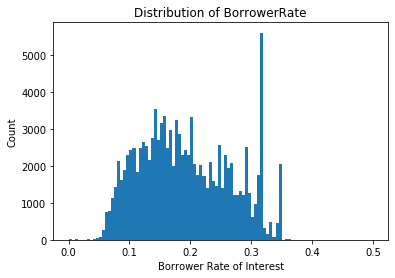

In [6]:
bins = np.arange(0, df.BorrowerRate.max()+0.005, 0.005)
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xlabel('Borrower Rate of Interest')
plt.ylabel('Count')
plt.title('Distribution of BorrowerRate');

## Do ProsperRating (numeric) alone decide the BorrowerRate?
1. The dataset has lot of people with a prosper rating between 4&5 due to which the borrower rate of interest between 0.15 and 0.2
2. This is a mid-value and will need more paramters to understand better



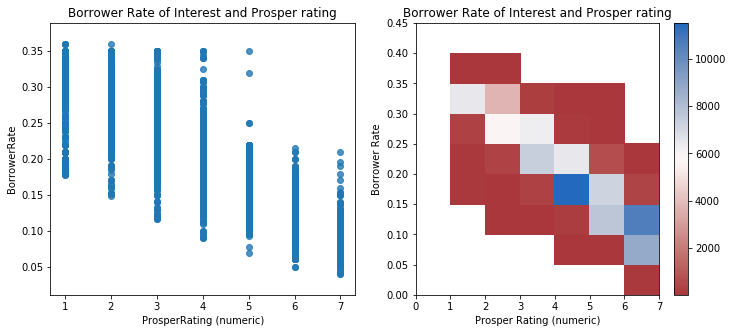

In [9]:
#Relationship between Borrower Rate and Prosper rating
plt.figure(figsize = [12,5])

plt.subplot(1,2,1)
sb.regplot(data = df, x = 'ProsperRating (numeric)', y = 'BorrowerRate', fit_reg = False)
plt.title('Borrower Rate of Interest and Prosper rating');


plt.subplot(1,2,2)
xbin = np.arange(0, df['ProsperRating (numeric)'].max()+1, 1)
ybin = np.arange(0, df['BorrowerRate'].max(), 0.05)
plt.hist2d(data = df, x = 'ProsperRating (numeric)', y = 'BorrowerRate', 
           bins = [xbin, ybin], cmap = 'vlag_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Prosper Rating (numeric)')
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate of Interest and Prosper rating');

## Can ProsperScore and ProsperRating together help decide BorrowerRate?
Yes! A higher ProsperScore and a higher ProsperRating (numeric) show that the BorrowerRate is low.

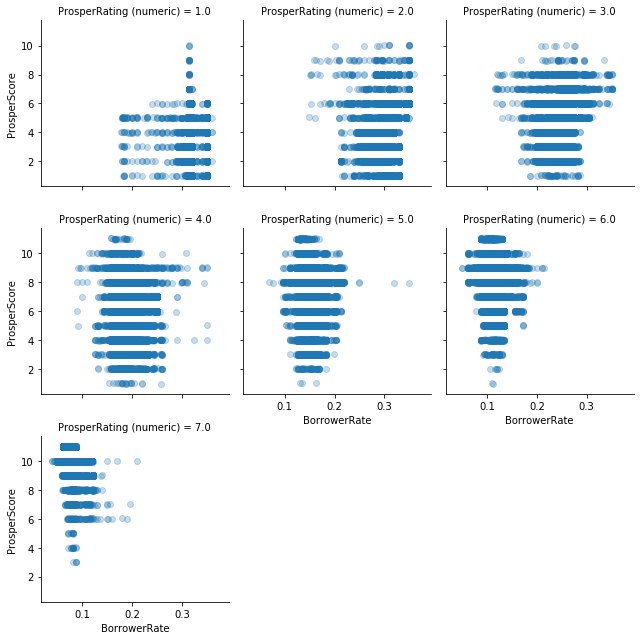

In [11]:
g = sb.FacetGrid(data = df, col = 'ProsperRating (numeric)', col_wrap =3, size = 3)
g.map(sb.regplot, 'BorrowerRate', 'ProsperScore', y_jitter = 0.04,fit_reg = False, scatter_kws = {'alpha' :1/4})
g.set_xlabels('BorrowerRate')
g.set_ylabels('ProsperScore');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!